# Exploratory Data Analysis
Telling the future is the exciting part of data mining.  Everyone wants to build the best model that can be the most accurate prediction of future results or have the best explanation for why the past occurred the way it has.  But in order to have a valuable model, it is important to understand the data, determine the shape, understand the predictors and the target variables (if any).  Understanding the scale of these values and their relationship to each other can save hours of testing different modelling techniques and parameter tuning.

The next cell is one that will appear in some configuration as the first in nearly every notebook.  It imports the key libraries we are going to use in our analysis and model building.  In the first case, we will depend on pandas and numpy for our data manipulation and we'll leverage matplotlib as our graphical library.  We'll also use the seaborn library to show off a few plots and visuals that are not quite as readily accessible with the matplotlib library.

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from pathlib import Path
import sys
sys.path.append('..')
from src.data import load_data

# If you are using a 'light' them
# comment out or remove this line
plt.style.use('dark_background')

## Boston Housing Dataset
Let's take a look at some basic data manipulation with pandas and understand how to get some data to work with.  In all of our examples, we'll use a pretty standard text format called (CSV) or comma-separated-values files.  This format is readable by nearly every statistical software package and by humans.  The first row is typically the name of the columns and each line of the file is a row of data with the values separated by commas.  The pandas library supports many different ways to load up a dataframe, which we will use as the primary mechanism for manipulating data in these notebooks.

### Business Context
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to ﬁve Boston employment centers
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000s
- **CAT.MEDV**: Is median value of owner-occupied home in tract above $30k (CAT.MEDV = 1) or not (CAT.MEDV = 0)

We can see that the input attributes have a mixture of units.

In [3]:
# Load up the housing dataset
housing_df = load_data('BostonHousing')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


### Exploratory Data Analysis (EDA)
Once we understand the business content, then we want to take a look at our data and see what else we can discover about the relationships between our target variable and the other independent factors.  

We'll end up doing quite a bit of EDA, usually we'll start with some EDA, clean up the data and munge it into an appropriate format for modeling and then we'll want to check out the results.  It pays to have a good grasp of a plotting library and some techniques to make this process go a bit faster.  There are a few libraries which are pretty common place in the data science with python world, including seaborn and matplotlib.  Many new libraries have been introduced recently as well that add much more interactive opportunities with less coding.


In [4]:
# Change the column to be more convenient (notice the space between . MEDV)
housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'},inplace=True)
# Take a look at the first few rows of data
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
# check the rows and columns
housing_df.shape

(506, 14)

We see from the ouput about that we have 506 rows and 14 columns, but we can't see all the columns - let's check out the column names and get an idea of the some descriptive statistics for each numerical column)

In [6]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
housing_df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX           int64
PTRATIO     float64
LSTAT       float64
MEDV        float64
CAT_MEDV      int64
dtype: object

Now that we have an idea of the numerical fields.  We should check out the distribution of the CAT_MEDV field to see how these are laid out.

In [8]:
print (housing_df.value_counts(['CAT_MEDV']))
# and also the percentages
housing_df.value_counts(['CAT_MEDV'])/len(housing_df)

CAT_MEDV
0           422
1            84
dtype: int64


CAT_MEDV
0           0.833992
1           0.166008
dtype: float64

We can now take a look at a couple of values as they relate to our target variable (CAT_MEDV).

In [9]:
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

In [10]:
ax=housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, 'Avg. MEDV')

In [11]:
dataForPlot= housing_df.groupby('CHAS').mean()['CAT_MEDV']*100
ax=dataForPlot.plot(kind='bar', figsize=[5,3])
ax.set_ylabel('% of CAT.MEDV')

Text(0, 0.5, '% of CAT.MEDV')

### Determining the interaction between a set of variables
Sometimes it is helpful to see many more dimensions of the data at once.  We can use color, size, shape and axises to show several dimensions, and one more commonly overlooked approach is to use faceting as yet another dimension.  Let's take a look at how the age of the houses vary by the relativeness to the Charles river.  

From here we can see that, as previously, there are many more homes not on the Charles River and also that the age of the homes is skewed heavily toward the older home ages.

(Check out the extra notebook [Visualization Samples](visualizationSamples.ipynb) to see another library and possible visualizations.) 

In [12]:
g = sns.FacetGrid(housing_df, col='CHAS')
g.map_dataframe(sns.histplot,x='AGE')

We may also be interested in the relationship between a set of the variables so that we can identify which ones may prove to be over-influencing a regression model.  For this we can use two approaches, first we'll look at a set of charts that are related in a pair-wise chart or a correlation map.  First a pairwise graph.  A pairwise graph shows the relationship between these 4 different variables to each other in one simple clean chart.

In [13]:
# setup a small subset of data
df = housing_df[['CRIM','INDUS','LSTAT',"MEDV"]]
sns.pairplot(df)

              CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM      1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN       -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS     0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS     -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX       0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM       -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE       0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS      -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD       0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX       0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO   0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
LSTAT     0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
MEDV     -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.69

<AxesSubplot:>

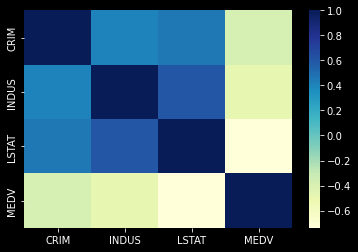

In [14]:
print(housing_df.corr())
sns.heatmap(df.corr(), cmap='YlGnBu')

In [15]:
correlationMatrix = df.corr()
# Convert our correlationMatrix to a one-dimensional array
correlationMatrix = correlationMatrix.unstack()
correlationMatrix[abs(correlationMatrix) > 0.7]

CRIM   CRIM     1.000000
INDUS  INDUS    1.000000
LSTAT  LSTAT    1.000000
       MEDV    -0.737663
MEDV   LSTAT   -0.737663
       MEDV     1.000000
dtype: float64

Next, we'll take a look at how to get our data into a shape and develop the factors so that we can better understand our data and make it better for modelling.
<div align='center'/>

[<- Back to TOC](./00-Introduction.ipynb)&emsp;&emsp;&emsp;[Next: Data Preparation ->](./20-DataPreparation.ipynb)

## Other datasets that are of interest for EDA
* [Amtrack](../data/Amtrak.csv) - includes data for timeseries analysis
* [Bankruptcy](../data/Bankruptcy.csv) - lots of factors to consider
* [Motor Vehicle Collisions](../data/NYPD_Motor_Vehicle_Collisions_1000.csv) - includes lat/long, useful for mapping visuals

## Other tools for EDA
You may find the notebook [Other Tools for EDA](./11-OtherToolsForEDA.ipynb) an interesting tour as well.